We have 12 classes. We have 6 fruits that are classified as 'good' or 'bad'. So, we have 12 classes. Lets take an example:
We have apple good or banana bad etc.

We will use the VIGG16 model from keras which is a CNN model and we will train for 5 epochs only the last layer. 

The data can be found: https://www.kaggle.com/datasets/ryandpark/fruit-quality-classification?fbclid=IwAR01WrwBFqeVrAb5f8enTjl5Xn4DFAx3XscyW2PVaM-h15MHCayPaurnnkA

## Descriptive analysis of the data

### Showing the data

In [11]:
# get the file paths:

import os

folder_path = r"C:\Users\vlass\OneDrive\Υπολογιστής\Metaptyxiako\3rd_Trimester\Machine_learning\1.Assigment\1.Main_Assigment\data_for_1st_model - Copy\Test"

# Get a list of all direct subfolders
subfolder_paths = [os.path.join(folder_path, subfolder) for subfolder in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, subfolder))]

# Printing all the subfolder paths
folders = []
for path in subfolder_paths:
    folders.append(path)


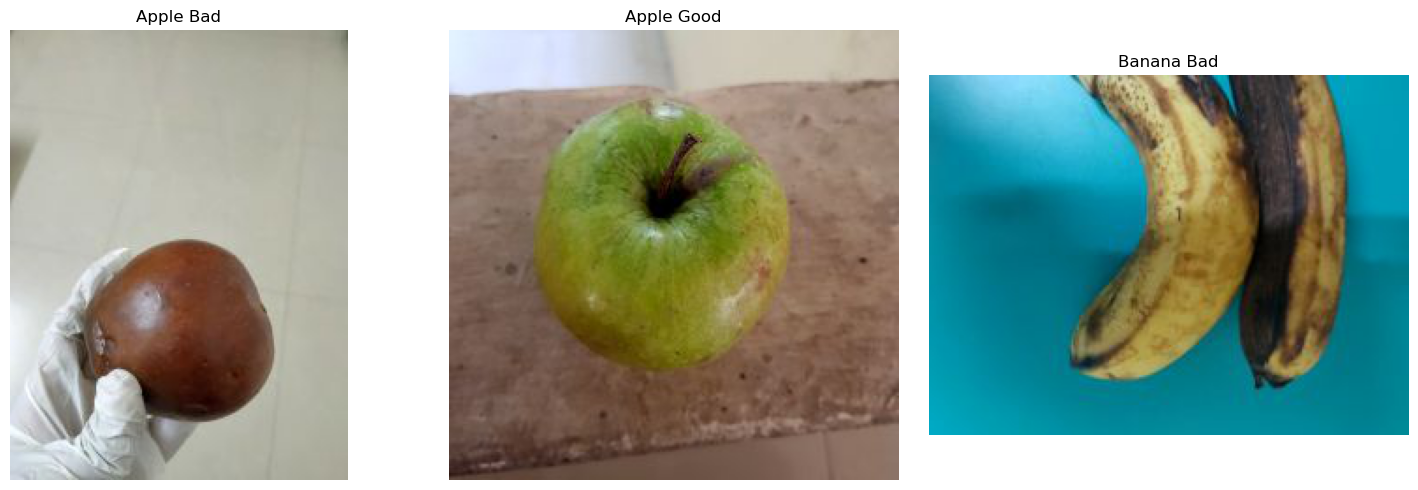

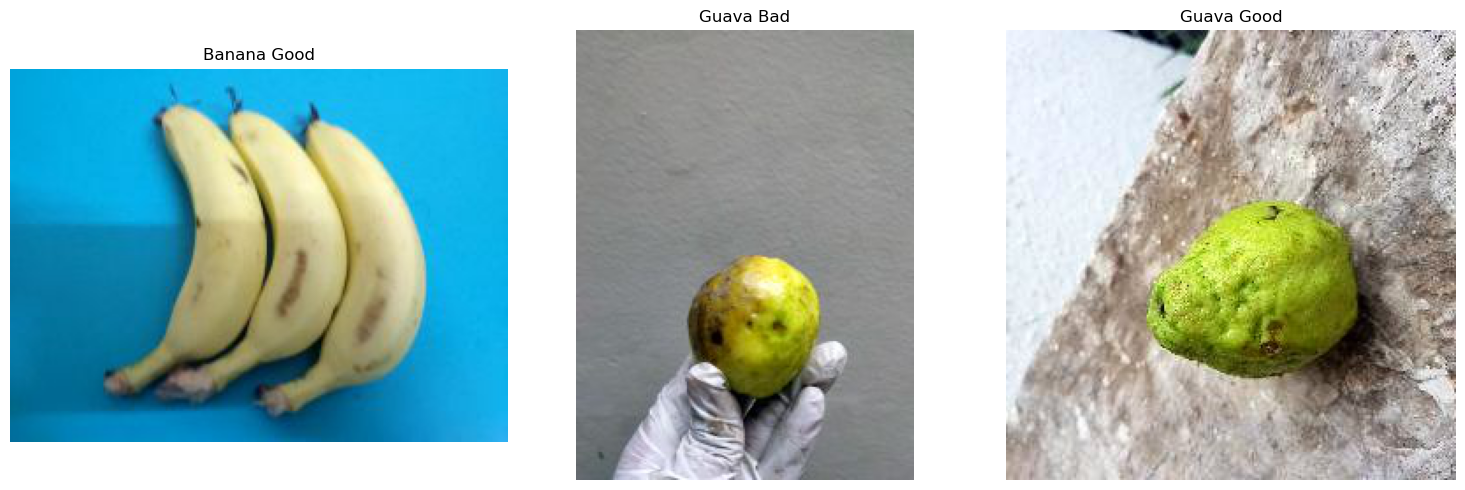

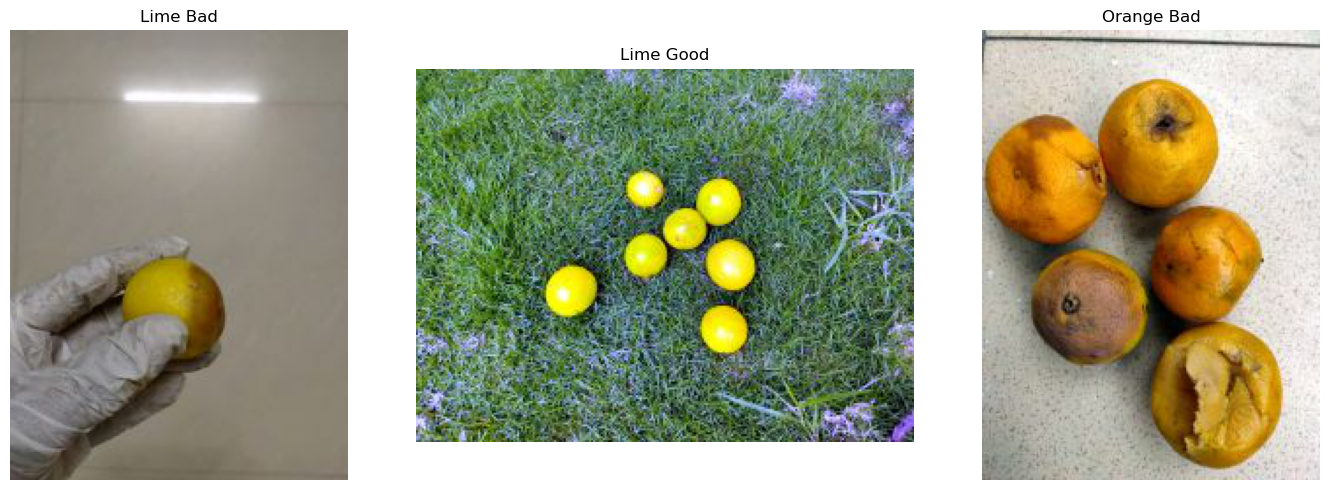

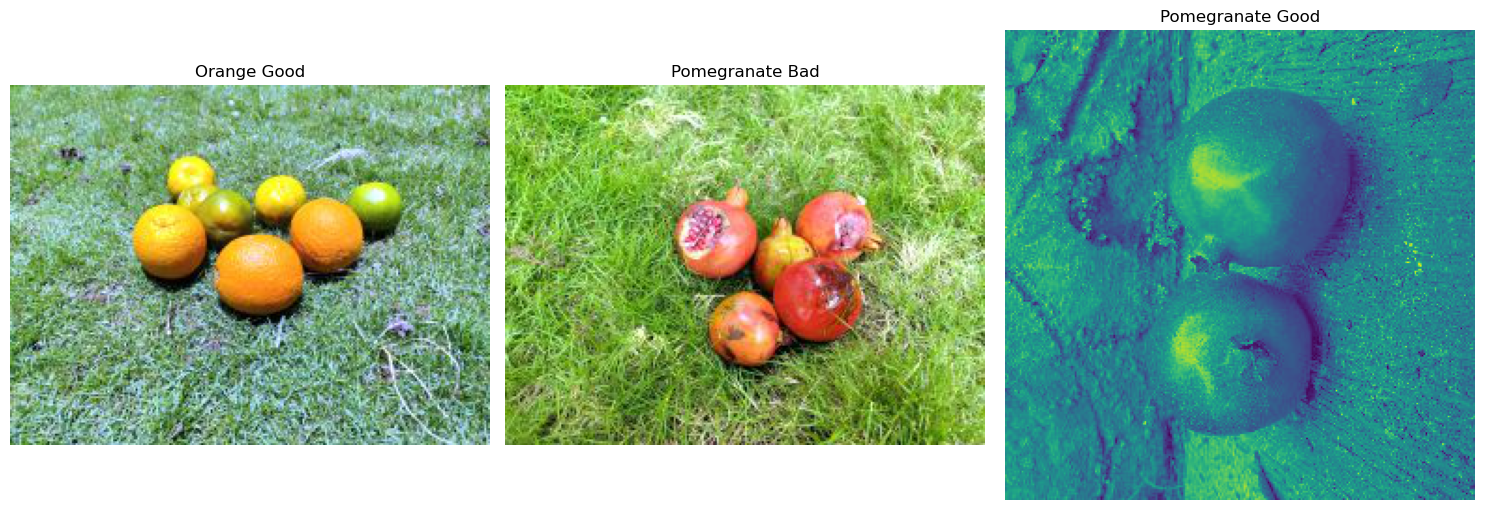

In [24]:
# Preview of data for each category

import os
import matplotlib.pyplot as plt
from PIL import Image

# Number of images to show per row
images_per_row = 3

# Total number of folders/images
num_folders = len(folders)

# Create initial subplots
fig, axes = plt.subplots(1, images_per_row, figsize=(15, 5))

for index, folder in enumerate(folders):
    for file_name in os.listdir(folder):
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(folder, file_name)
            img = Image.open(image_path)
            
            # Get the current axis
            ax = axes[index % images_per_row]
            
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(os.path.basename(folder).replace('_', ' '))  
            
            
            if (index + 1) % images_per_row == 0 or index == num_folders - 1:
                plt.tight_layout()
                plt.show()
                
                
                if index != num_folders - 1:
                    fig, axes = plt.subplots(1, images_per_row, figsize=(15, 5))
            
            break

### Pie chart 

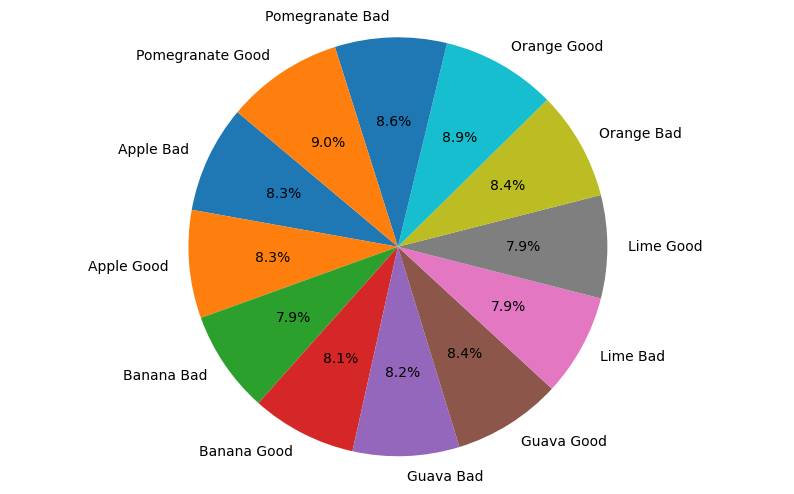

In [26]:
import os
import matplotlib.pyplot as plt


# Initialize lists to store counts and labels
photo_counts = []
folder_names = []

# Traverse each folder
for folder in folders:
    photo_count = 0  # Initialize counter for each folder
    for file_name in os.listdir(folder):
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            photo_count += 1
    photo_counts.append(photo_count)
    folder_names.append(os.path.basename(folder).replace('_', ' '))  # Add folder name to labels list

# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(photo_counts, labels=folder_names, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


## Spliting the data to train, validation and test 

In [12]:
#------------------- SPLIT 70% training, 15% validation, 15% test ---------------------#

# import os

# base_dir_train = r"C:\Users\vlass\OneDrive\Υπολογιστής\Metaptyxiako\3rd_Trimester\Machine_learning\1.Assigment\1.Main_Assigment\data_for_1st_model - Copy\Train"
# base_dir_validation = r"C:\Users\vlass\OneDrive\Υπολογιστής\Metaptyxiako\3rd_Trimester\Machine_learning\1.Assigment\1.Main_Assigment\data_for_1st_model - Copy\Validation"
# base_dir_test = r"C:\Users\vlass\OneDrive\Υπολογιστής\Metaptyxiako\3rd_Trimester\Machine_learning\1.Assigment\1.Main_Assigment\data_for_1st_model - Copy\Test"

# subdirs_train = [os.path.join(base_dir_train, d) for d in os.listdir(base_dir_train) if os.path.isdir(os.path.join(base_dir_train, d))]
# subdirs_validation = [os.path.join(base_dir_validation, d) for d in os.listdir(base_dir_validation) if os.path.isdir(os.path.join(base_dir_validation, d))]
# subdirs_test = [os.path.join(base_dir_test, d) for d in os.listdir(base_dir_test) if os.path.isdir(os.path.join(base_dir_test, d))]

# #------------------------------------- for VALIDATION ----------------------------------------#

# for folders in range(len(subdirs_train)):
#     # List all files in the source directory
#     file = os.listdir(subdirs_train[folders])
    
#     # Shuffle the files randomly (if you want a random 15%)
#     random.shuffle(file)
    
#     # Calculate 15% of total files
#     num_files_to_move = int(0.15 * len(file))
    
#     # Move the calculated number of files for the 'BAD' for VALIDATION 
#     for files in file[:num_files_to_move]:
#         shutil.move(os.path.join(subdirs_train[folders], files), os.path.join(subdirs_validation[folders], files))
        


        
# #------------------------------------- for TEST ----------------------------------------#

# for folders in range(len(subdirs_train)):
#     # List all files in the source directory
#     file = os.listdir(subdirs_train[folders])
    
#     # Shuffle the files randomly (if you want a random 15%)
#     random.shuffle(file)
    
#     # Calculate 15% of total files
#     num_files_to_move = int(0.15 * len(file))
    
#     # Move the calculated number of files for the 'BAD' for VALIDATION 
#     for files in file[:num_files_to_move]:
#         shutil.move(os.path.join(subdirs_train[folders], files), os.path.join(subdirs_test[folders], files))

## Model Training

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [14]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))


In [15]:
x = base_model.output
x = Flatten()(x)  # Flatten the output layer to 1 dimension
x = Dense(512, activation='relu')(x)  # Add a fully connected layer with 512 hidden units and ReLU activation
x = Dropout(0.5)(x)  # Add dropout to prevent overfitting
predictions = Dense(12, activation='softmax')(x)  # A final dense layer with 2 outputs for 'bad' and 'good'

model = Model(inputs=base_model.input, outputs=predictions)


In [16]:
for layer in base_model.layers:
    layer.trainable = False


In [17]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [18]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(r'C:\Users\vlass\OneDrive\Υπολογιστής\Metaptyxiako\3rd_Trimester\Machine_learning\1.Assigment\1.Main_Assigment\data_for_1st_model - Copy\Train',
                                                    target_size=(256, 256),
                                                    batch_size=32,
                                                    class_mode='categorical')



Found 9944 images belonging to 12 classes.


In [19]:
validation_datagen = ImageDataGenerator(rescale=1./255)


In [20]:
validation_generator = validation_datagen.flow_from_directory(r'C:\Users\vlass\OneDrive\Υπολογιστής\Metaptyxiako\3rd_Trimester\Machine_learning\1.Assigment\1.Main_Assigment\data_for_1st_model - Copy\Validation',
                                                              target_size=(256, 256),
                                                              batch_size=32,
                                                              class_mode='categorical')


Found 2057 images belonging to 12 classes.


In [21]:
import tensorflow as tf
tf.random.set_seed(123)

In [22]:
history = model.fit(train_generator,
                    steps_per_epoch=311,   # Adjusted based on your dataset size
                    epochs=5,              # Adjust as required
                    validation_data=validation_generator,
                    validation_steps=65)   # Adjusted based on your dataset size

Epoch 1/5
311/311 [==============================] - 1692s 5s/step - loss: 1.6578 - accuracy: 0.4781 - val_loss: 0.6908 - val_accuracy: 0.8216
Epoch 2/5
311/311 [==============================] - 1912s 6s/step - loss: 1.0745 - accuracy: 0.6188 - val_loss: 0.5068 - val_accuracy: 0.8386
Epoch 3/5
311/311 [==============================] - 2000s 6s/step - loss: 0.9520 - accuracy: 0.6585 - val_loss: 0.4212 - val_accuracy: 0.8658
Epoch 4/5
311/311 [==============================] - 1755s 6s/step - loss: 0.8829 - accuracy: 0.6822 - val_loss: 0.4080 - val_accuracy: 0.8683
Epoch 5/5
311/311 [==============================] - 1740s 6s/step - loss: 0.8149 - accuracy: 0.7114 - val_loss: 0.3839 - val_accuracy: 0.8658


In [ ]:
# We save our model

model.save(r'C:\Users\vlass\OneDrive\Υπολογιστής\Metaptyxiako\3rd_Trimester\Machine_learning\1.Assigment\1.Main_Assigment\data_for_1st_model - Copy\first_model.keras')

## Testing the model

### Overall accuracy

In [ ]:
# We load the model

loaded_model = tf.keras.models.load_model(r"C:\Users\vlass\OneDrive\Υπολογιστής\Metaptyxiako\3rd_Trimester\Machine_learning\1.Assigment\1.Main_Assigment\data_for_1st_model - Copy\first_model.keras")

In [30]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    r'C:\Users\vlass\OneDrive\Υπολογιστής\Metaptyxiako\3rd_Trimester\Machine_learning\1.Assigment\1.Main_Assigment\data_for_1st_model - Copy\Test',
    target_size=(256, 256),  
    batch_size=32,
    class_mode='categorical',
    shuffle=False)  # Important: do not shuffle test data!


Found 1750 images belonging to 12 classes.


In [32]:
# we find the accuracy on the test data. We find it at 87%

test_loss, test_accuracy = loaded_model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


55/55 [==============================] - 228s 4s/step - loss: 0.3670 - accuracy: 0.8783
Test Loss: 0.3669806718826294
Test Accuracy: 0.8782857060432434


### Accuracy for each category

In [36]:
# Get true labels from the test generator
true_labels = test_generator.classes

# Get predicted labels
predictions = loaded_model.predict(test_generator, verbose=1)
predicted_labels = np.argmax(predictions, axis=1)

55/55 [==============================] - 229s 4s/step


In [39]:
# Extract class names from the test generator
classes = list(test_generator.class_indices.keys())

In [41]:
accuracies = {}  # A dictionary to store accuracies for each class

for class_name in classes:
    # Get indices where true label is the current class
    idx = [i for i, label in enumerate(true_labels) if label == classes.index(class_name)]

    # Extract the true and predicted labels for these indices
    true_for_class = [true_labels[i] for i in idx]
    predicted_for_class = [predicted_labels[i] for i in idx]

    # Compute accuracy for the current class
    correct_predictions = sum([1 for i, j in zip(true_for_class, predicted_for_class) if i == j])
    accuracies[class_name] = correct_predictions / len(true_for_class) * 100  # accuracy as a percentage

# Print out accuracies for each class
for fruit, accuracy in accuracies.items():
    print(f"Accuracy for {fruit}: {accuracy:.2f}%")


Accuracy for Apple_Bad: 78.62%
Accuracy for Apple_Good: 82.19%
Accuracy for Banana_Bad: 99.28%
Accuracy for Banana_Good: 99.30%
Accuracy for Guava_Bad: 68.75%
Accuracy for Guava_Good: 85.03%
Accuracy for Lime_Bad: 81.88%
Accuracy for Lime_Good: 99.28%
Accuracy for Orange_Bad: 78.23%
Accuracy for Orange_Good: 85.81%
Accuracy for Pomegranate_Bad: 97.35%
Accuracy for Pomegranate_Good: 98.10%


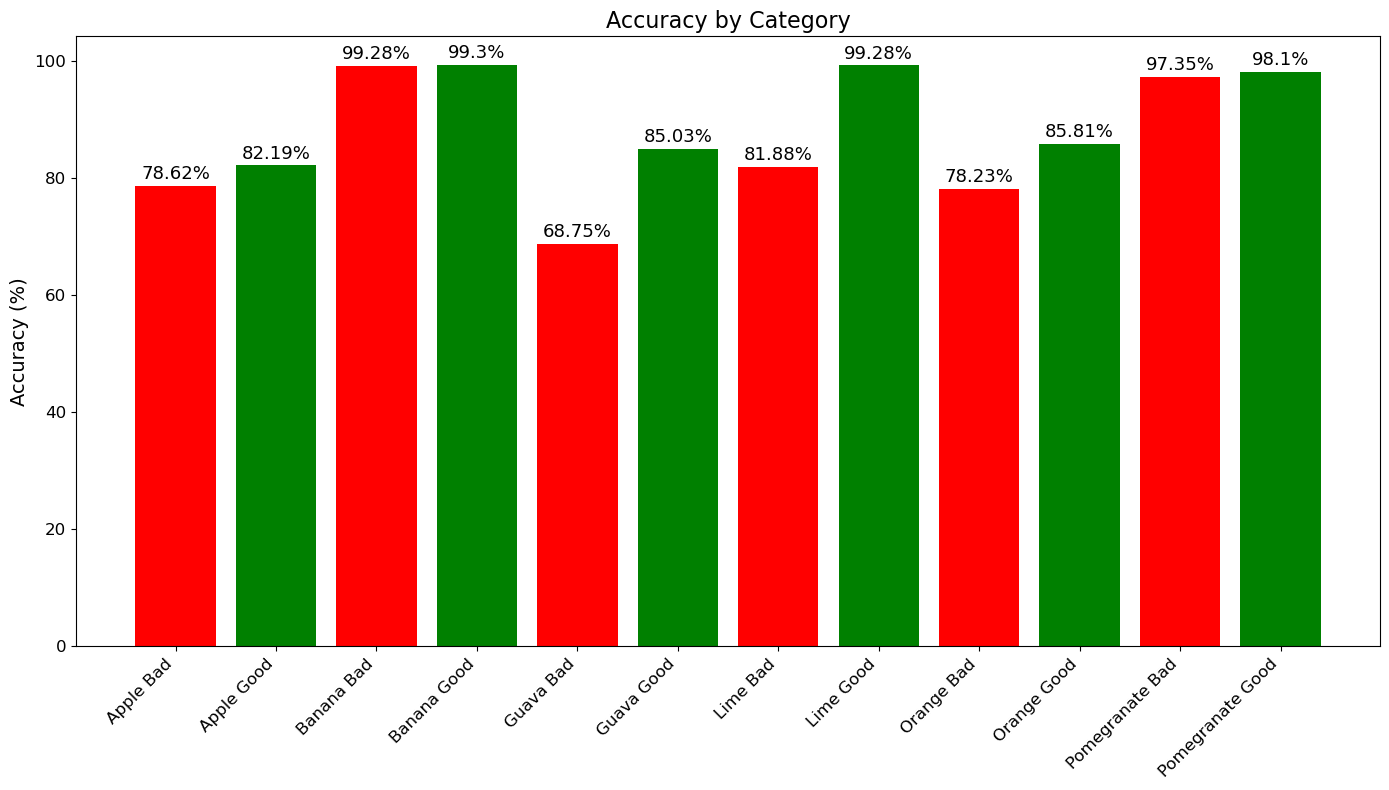

In [72]:
# accuracy by category with bar plot 

# Extracting keys and values from the dictionary
# categories = list(accuracies.keys())
# categories = [category.replace('_', ' ') for category in categories]
# accuracies = list(accuracies.values())

# Create a bar plot
plt.figure(figsize=(14, 8))
bars = plt.bar(categories, accuracies, color=['red', 'green'] * (len(categories) // 2))  # alternating colors

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"{round(yval, 2)}%", ha='center', va='bottom', fontsize=13)



plt.ylabel('Accuracy (%)', fontsize = 14)
plt.title('Accuracy by Category', fontsize = 16)
plt.xticks(rotation=45, ha="right", fontsize = 12)  # Rotate category names for better visibility
plt.yticks(fontsize=12)  # Set y-axis tick labels size to 13
plt.tight_layout()  # Adjust layout for better visibility

# Display the plot
plt.show()

### Exploring images that have the worst accuracy

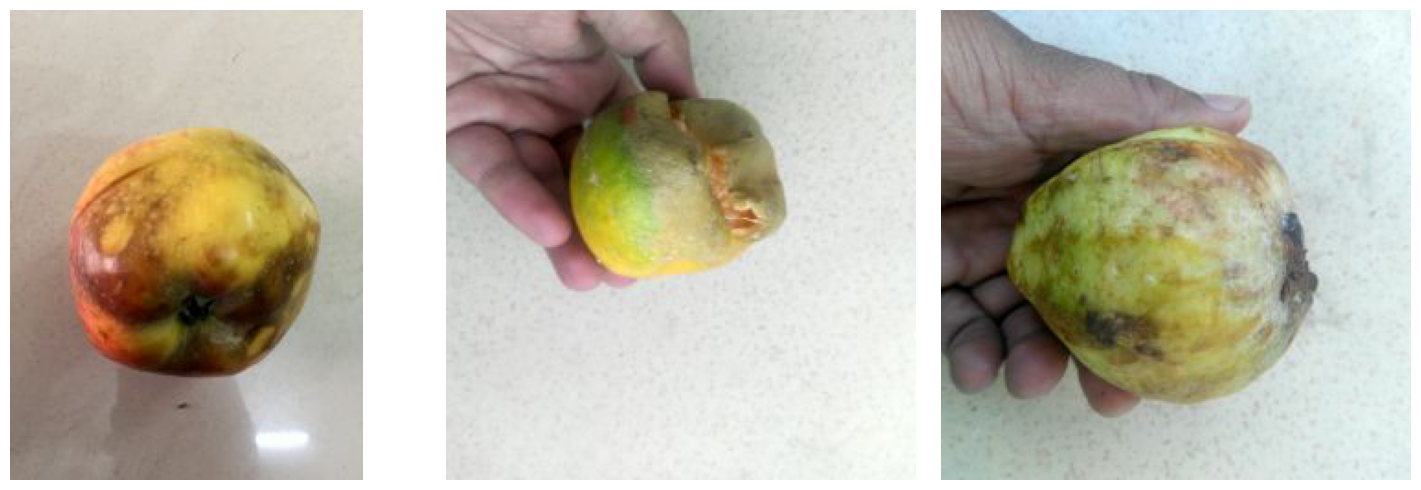

In [99]:
import matplotlib.pyplot as plt
from PIL import Image

# List of specific image paths you want to display
image_paths = [
    r"C:\Users\vlass\OneDrive\Υπολογιστής\Metaptyxiako\3rd_Trimester\Machine_learning\1.Assigment\1.Main_Assigment\data_for_1st_model - Copy\Test\Apple_Bad\IMG_8195.JPG",
    r"C:\Users\vlass\OneDrive\Υπολογιστής\Metaptyxiako\3rd_Trimester\Machine_learning\1.Assigment\1.Main_Assigment\data_for_1st_model - Copy\Test\Orange_Bad\IMG_20190923_182254_1.jpg",
    r"C:\Users\vlass\OneDrive\Υπολογιστής\Metaptyxiako\3rd_Trimester\Machine_learning\1.Assigment\1.Main_Assigment\data_for_1st_model - Copy\Test\Guava_Bad\IMG_20190822_080806_1.jpg"
]

# Load the images
images = [Image.open(img_path) for img_path in image_paths]

# Display the images
fig, axes = plt.subplots(1, len(images), figsize=(15, 5))

for ax, img, img_path in zip(axes, images, image_paths):
    ax.imshow(img)
    #ax.set_title(os.path.basename(os.path.dirname(img_path)).replace("_", " "))
    ax.axis('off')

plt.tight_layout()
plt.show()

# the order is: Apple Bad, Orange Bad, Guava Bad 

In [ ]:
# CREATE FOR THE WORST 1 IMAGE WHERE DID IT MISSICLASIFIES. LIKE A TREE GRAM. ALSO, A COUNTER 

### Ground truth vs Prediction in one image

In [73]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

img_path = r"C:\Users\vlass\OneDrive\Υπολογιστής\Metaptyxiako\3rd_Trimester\Machine_learning\1.Assigment\1.Main_Assigment\data_for_1st_model - Copy\Test\Pomegranate_Bad\IMG_20190822_084508_1.jpg"
img = image.load_img(img_path, target_size=(256, 256))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.  # Model was trained with inputs normalized to [0,1]


In [76]:
prediction = loaded_model.predict(img_tensor)
predicted_class = np.argmax(prediction, axis=1)


1/1 [==============================] - 0s 240ms/step


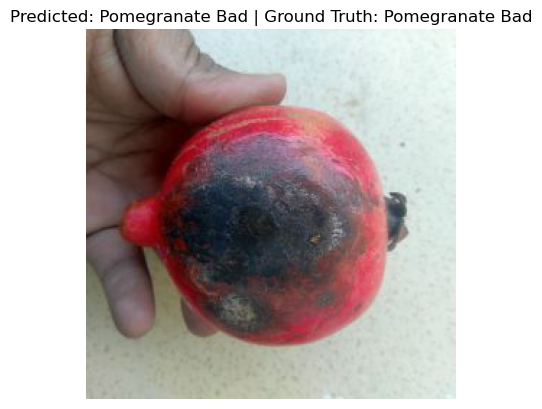

In [87]:
class_names = test_generator.class_indices
class_names = {v: k for k, v in class_names.items()}  # Flipping keys and values

name = class_names[predicted_class[0]]
name = name.replace("_", " ")

plt.imshow(img_tensor[0])
plt.title(f"Predicted: {name} | Ground Truth: Pomegranate Bad")
plt.axis('off')
plt.show()


In [29]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    r'C:\Users\vlass\OneDrive\Υπολογιστής\Metaptyxiako\3rd_Trimester\Machine_learning\1.Assigment\1.Main_Assigment\data_for_1st_model - Copy\Test',
    target_size=(256, 256),  
    batch_size=32,
    class_mode='categorical',
    shuffle=False)  # Important: do not shuffle test data!

Found 1750 images belonging to 12 classes.


In [30]:
test_loss, test_accuracy = loaded_model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


55/55 [==============================] - 228s 4s/step - loss: 0.3670 - accuracy: 0.8783
Test Loss: 0.3669806718826294
Test Accuracy: 0.8782857060432434
